In [1]:
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
basedir = "/Users/bono/Desktop/gm2FieldAnalysis/MuonConvolution/"

## First, the old 60 file that i used to give the first BAM update (never accounted for the timezone offset)

In [2]:
path = basedir + 'synthesis/data/60H_field_ctag_dqm.pkl'
df_old = pd.read_pickle(path)
df_old[['DateTime','D','ctags']]

DateTime        D  ctags
run   subrun                                    
15921 0      2018-04-22 13:14:02  841.735      0
      0      2018-04-22 13:14:04  841.706      0
      0      2018-04-22 13:14:06  841.685      0
      0      2018-04-22 13:14:08  841.714      0
      0      2018-04-22 13:14:10  841.708      0
...                          ...      ...    ...
15988 206    2018-04-24 23:59:16  841.007  19978
      206    2018-04-24 23:59:18  840.980  19978
      206    2018-04-24 23:59:20  841.001  19978
      206    2018-04-24 23:59:22  840.987  19978
      206    2018-04-24 23:59:24  841.058  19978

[21498 rows x 3 columns]

/usr/local/lib/python3.7/site-packages/pandas/plotting/_matplotlib/converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


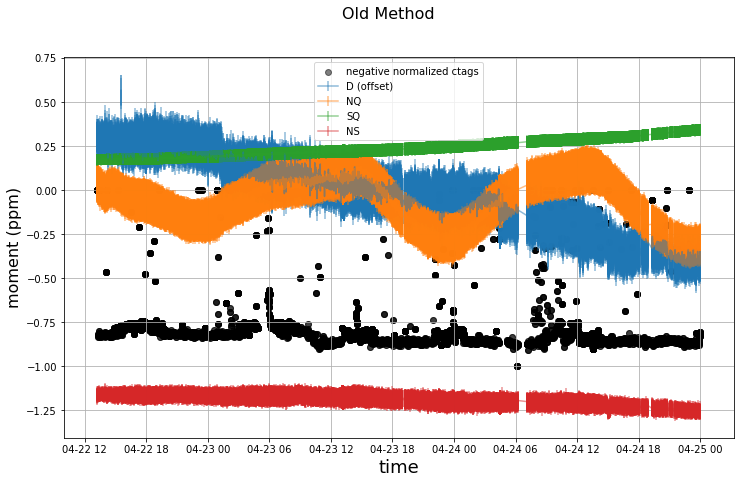

In [3]:
df = df_old.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
ctag_mean = df['ctags'].max()
df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
plt.scatter(df['start_time'], -df['ctags_norm'], 
            label='negative normalized ctags',alpha=0.5,color='black')

fig.suptitle('Old Method', fontsize=16)
plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()

plt.show()

## Now load a pickel file that was processed in the newer, faster way useing pandaslq, but also did not account for the timing offset

In [4]:
path = basedir + 'field_info/data/'
path = path + '60Hr_Average_Comparison_all_3956_3997_norescut_NoAvgBADOFFSET.pkl'
df_bad = pd.read_pickle(path)

### To compare directly with the old method, which artifically chopped off the end (hard coded it by accident), you need to chop off the end in the same place

In [5]:
mask = df_bad['DateTime'] <= df_old['DateTime'].max()
df_bad = df_bad[mask]

### Also need to shift the ctag column by one to match

In [6]:
df_bad.ctags = df_bad.ctags.shift(1)
df_bad

DateTime        D        eD        NQ       eNQ  \
run   subrun                                                              
15921 0      2018-04-22 13:14:00  841.789  0.079075  0.019905  0.096987   
      0      2018-04-22 13:14:02  841.735  0.079075  0.032789  0.096987   
      0      2018-04-22 13:14:04  841.706  0.079075  0.060667  0.096987   
      0      2018-04-22 13:14:06  841.685  0.079075  0.054613  0.096987   
      0      2018-04-22 13:14:08  841.714  0.079075  0.044995  0.096987   
...                          ...      ...       ...       ...       ...   
15988 206    2018-04-24 23:59:16  841.007  0.087315 -0.310075  0.100196   
      206    2018-04-24 23:59:18  840.980  0.087315 -0.287574  0.100196   
      206    2018-04-24 23:59:20  841.001  0.087315 -0.290094  0.100196   
      206    2018-04-24 23:59:22  840.987  0.087315 -0.305687  0.100196   
      206    2018-04-24 23:59:24  841.058  0.087315 -0.337580  0.100196   

                    SQ       eSQ       NS       eNS    ctags  \
run   subrun                                                   
15921 0       0.176251  0.030298 -1.13956  0.035181      NaN   
      0       0.169870  0.030298 -1.15897  0.035181      0.0   
      0       0.175534  0.030298 -1.16613  0.035181      0.0   
      0       0.173558  0.030298 -1.17401  0.035181      0.0   
      0       0.173786  0.030298 -1.16228  0.035181      0.0   
...                ...       ...      ...       ...      ...   
15988 206     0.345685  0.031365 -1.24907  0.037755  19978.0   
      206     0.342905  0.031365 -1.25875  0.037755  19978.0   
      206     0.342208  0.031365 -1.25413  0.037755  19978.0   
      206     0.342131  0.031365 -1.25930  0.037755  19978.0   
      206     0.344414  0.031365 -1.23384  0.037755  19978.0   

                      start_time            end_time  poor_ctags  
run   subrun                                                      
15921 0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
...                          ...                 ...         ...  
15988 206    2018-04-24 23:59:10 2018-04-24 23:59:25       542.5  
      206    2018-04-24 23:59:10 2018-04-24 23:59:25       542.5  
      206    2018-04-24 23:59:10 2018-04-24 23:59:25       542.5  
      206    2018-04-24 23:59:10 2018-04-24 23:59:25       542.5  
      206    2018-04-24 23:59:10 2018-04-24 23:59:25       542.5  

[22895 rows x 13 columns]

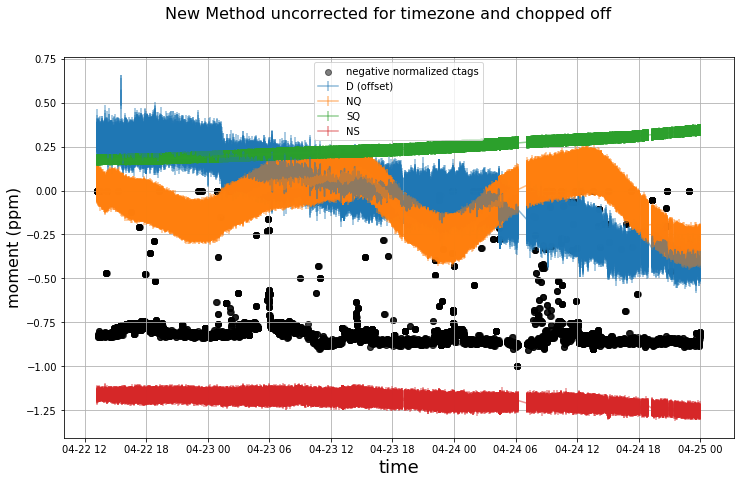

In [7]:
df = df_bad.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
ctag_mean = df['ctags'].max()
df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
plt.scatter(df['start_time'], -df['ctags_norm'], 
            label='negative normalized ctags',alpha=0.5,color='black')

fig.suptitle('New Method uncorrected for timezone and chopped off', fontsize=16)
plt.grid()
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()

plt.show()

## Finally, what i think should be the final 60 pickeled file, which accounts for the timezone properly

In [8]:
path = basedir + 'field_info/data/'
path = path + '60Hr_Average_Comparison_all_3956_3997_norescut_NoAvg.pkl'
df_new = pd.read_pickle(path)
df_new

DateTime        D        eD        NQ       eNQ  \
run   subrun                                                              
15921 0      2018-04-22 13:14:00  841.706  0.097905 -0.069362  0.104364   
      0      2018-04-22 13:14:02  841.693  0.097905 -0.055040  0.104364   
      0      2018-04-22 13:14:04  841.657  0.097905 -0.065431  0.104364   
      0      2018-04-22 13:14:06  841.735  0.097905 -0.065005  0.104364   
      0      2018-04-22 13:14:08  841.676  0.097905 -0.051436  0.104364   
...                          ...      ...       ...       ...       ...   
15991 149    2018-04-25 02:00:26  840.847  0.046195  0.204089  0.087159   
      149    2018-04-25 02:00:28  840.842  0.046195  0.221452  0.087159   
      149    2018-04-25 02:00:30  840.865  0.046195  0.186304  0.087159   
      149    2018-04-25 02:00:32  840.842  0.046195  0.187187  0.087159   
      149    2018-04-25 02:00:34  840.827  0.046195  0.204910  0.087159   

                    SQ       eSQ       NS       eNS  ctags  \
run   subrun                                                 
15921 0       0.179143  0.031806 -1.14899  0.040042      0   
      0       0.179399  0.031806 -1.15387  0.040042      0   
      0       0.178369  0.031806 -1.16658  0.040042      0   
      0       0.176956  0.031806 -1.14100  0.040042      0   
      0       0.179627  0.031806 -1.16408  0.040042      0   
...                ...       ...      ...       ...    ...   
15991 149     0.370243  0.028862 -1.26263  0.028667  20184   
      149     0.372139  0.028862 -1.26311  0.028667  20184   
      149     0.373239  0.028862 -1.25374  0.028667  20184   
      149     0.372619  0.028862 -1.26633  0.028667  20184   
      149     0.372244  0.028862 -1.26974  0.028667  20184   

                      start_time            end_time  poor_ctags  
run   subrun                                                      
15921 0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
      0      2018-04-22 13:14:00 2018-04-22 13:14:34       231.5  
...                          ...                 ...         ...  
15991 149    2018-04-25 02:00:18 2018-04-25 02:00:34       514.8  
      149    2018-04-25 02:00:18 2018-04-25 02:00:34       514.8  
      149    2018-04-25 02:00:18 2018-04-25 02:00:34       514.8  
      149    2018-04-25 02:00:18 2018-04-25 02:00:34       514.8  
      149    2018-04-25 02:00:18 2018-04-25 02:00:34       514.8  

[23645 rows x 13 columns]

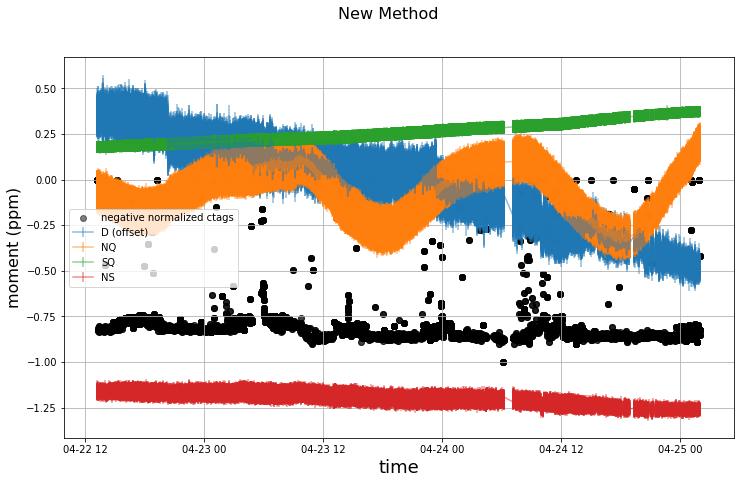

In [9]:
df = df_new.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean
ctag_mean = df['ctags'].max()
df['ctags_norm'] = df['ctags']/ctag_mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df['DateTime'], df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df['DateTime'], df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df['DateTime'], df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)
plt.scatter(df['start_time'], -df['ctags_norm'], 
            label='negative normalized ctags',alpha=0.5,color='black')

plt.grid()
fig.suptitle('New Method', fontsize=16)
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()

plt.show()

In [10]:
# 


## Get the final answer for each

In [79]:
#import the relevant field moments functions
path = basedir + 'field_info'
sys.path.insert(0,path)
from format_field import field_team_to_standard_moments as ftts
from field_grid import *

### Quick diversion: get the flat average for the plain 60 hour file, without dqc cuts
Need to inspect the plain data

In [80]:
from format_field import get_field_df
#The flat average
path = basedir + 'field_info/data/'
file = path + '60Hr_Average_Comparison_all_3956_3997_norescut_NoAvg.txt'
df_plain = get_field_df(file)
df_plain.head()

,D,eD,NQ,eNQ,SQ,eSQ,NS,eNS
DateTime,,,,,,,,
2018-04-22 07:52:40,841.744,0.046244,0.060869,0.087027,0.163640,0.028346,-1.14625,0.028019
2018-04-22 07:52:42,841.765,0.046244,0.073984,0.087027,0.162312,0.028346,-1.14114,0.028019
2018-04-22 07:52:44,841.770,0.046244,0.045627,0.087027,0.161684,0.028346,-1.14125,0.028019
2018-04-22 07:52:46,841.767,0.046244,0.085345,0.087027,0.162837,0.028346,-1.14056,0.028019
2018-04-22 07:52:48,841.793,0.046244,0.058946,0.087027,0.164271,0.028346,-1.13227,0.028019


/usr/local/lib/python3.7/site-packages/IPython/core/pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


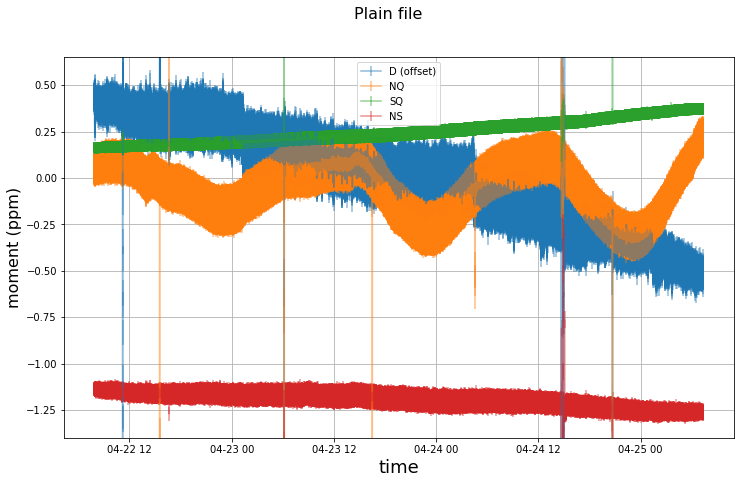

In [95]:
df = df_plain.copy()
#for plotting together, subtract the dipole average from the dipole
mean = df['D'].mean()
df['Doff'] = df['D'] - mean

#plot the moments together
fig = plt.figure(figsize=(12,7))
plt.errorbar(df.index, df['Doff'], 
             yerr=df['eD'], label='D (offset)',alpha=0.5)
plt.errorbar(df.index, df['NQ'], 
             yerr=df['eNQ'], label='NQ',alpha=0.5)
plt.errorbar(df.index, df['SQ'],
             yerr=df['eSQ'], label='SQ',alpha=0.5)
plt.errorbar(df.index, df['NS'], 
             yerr=df['eNS'], label='NS',alpha=0.5)

plt.grid()
fig.suptitle('Plain file', fontsize=16)
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()
axes = plt.gca()
axes.set_ylim([-1.40,0.65])
plt.show()

In [83]:
df = df_plain.copy()
avgs_plain = np.asarray([df["D"].mean(), df["NQ"].mean(), df["SQ"].mean(),df["NS"].mean()])
avgs_plain

array([ 8.41359270e+02, -5.18626640e-02,  2.48287632e-01, -1.19503180e+00])

### now get the flat time average for the multipoles for the already loaded pkl files

In [84]:
df = df_old.copy()
avgs_old = np.asarray([df["D"].mean(), df["NQ"].mean(), df["SQ"].mean(),df["NS"].mean()])
avgs_old

array([ 8.41406776e+02, -1.78490707e-02,  2.34302531e-01, -1.18527388e+00])

In [85]:
df = df_bad.copy()
avgs_bad = np.asarray([df["D"].mean(), df["NQ"].mean(), df["SQ"].mean(),df["NS"].mean()])
avgs_bad

array([ 8.41404821e+02, -2.05521334e-02,  2.34848863e-01, -1.18565904e+00])

In [86]:
df = df_new.copy()
avgs_new = np.asarray([df["D"].mean(), df["NQ"].mean(), df["SQ"].mean(),df["NS"].mean()])
avgs_new

array([ 8.41332619e+02, -5.69562491e-02,  2.52044656e-01, -1.19637386e+00])

and the comparisons:

In [66]:
avgs_bad - avgs_old

array([-0.00195507, -0.00270306,  0.00054633, -0.00038517])

In [67]:
avgs_new - avgs_old

array([-0.07415713, -0.03910718,  0.01774212, -0.01109998])

In [87]:
avgs_new - avgs_plain

array([-0.02665062, -0.00509359,  0.00375702, -0.00134206])

In [88]:
avgs_old - avgs_plain

array([ 0.04750651,  0.03401359, -0.0139851 ,  0.00975792])

### Now get the ctag weighted averages for each file

In [12]:
df = df_old.copy()
total_ctags = df["ctags"].sum()
b = [
    (df["D"]*df["ctags"]).sum()/total_ctags,
    (df["NQ"]*df["ctags"]).sum()/total_ctags,
    (df["SQ"]*df["ctags"]).sum()/total_ctags,
    (df["NS"]*df["ctags"]).sum()/total_ctags
    ]
c_old,s_old = ftts(b)

In [13]:
df = df_bad.copy()
total_ctags = df["ctags"].sum()
b = [
    (df["D"]*df["ctags"]).sum()/total_ctags,
    (df["NQ"]*df["ctags"]).sum()/total_ctags,
    (df["SQ"]*df["ctags"]).sum()/total_ctags,
    (df["NS"]*df["ctags"]).sum()/total_ctags
    ]
c_bad,s_bad = ftts(b)

In [14]:
df = df_new.copy()
total_ctags = df["ctags"].sum()
b = [
    (df["D"]*df["ctags"]).sum()/total_ctags,
    (df["NQ"]*df["ctags"]).sum()/total_ctags,
    (df["SQ"]*df["ctags"]).sum()/total_ctags,
    (df["NS"]*df["ctags"]).sum()/total_ctags
    ]
c_new,s_new = ftts(b)

In [15]:
print('----old----')
print(c_old,'\n')
print(s_old,'\n')
print('----bad----')
print(c_bad,'\n')
print(s_bad,'\n')
print('----new----')
print(c_new,'\n')
print(s_new,'\n')
print('----bad - old----')
print(c_bad - c_old,'\n')
print(s_bad - s_old,'\n')
print('----new - bad----')
print(c_new - c_bad,'\n')
print(s_new - s_bad,'\n')
print('----new - old----')
print(c_new - c_old,'\n')
print(s_new - s_old,'\n')



----old----
[ 8.41413353e+02 -9.48434999e-03 -1.18420911e+00] 

[0.         0.23283668 0.        ] 

----bad----
[ 8.41410286e+02 -1.33718318e-02 -1.18477440e+00] 

[0.         0.23364909 0.        ] 

----new----
[ 8.41334531e+02 -6.89047778e-02 -1.19651907e+00] 

[0.       0.251143 0.      ] 

----bad - old----
[-0.00306692 -0.00388748 -0.00056529] 

[0.         0.00081241 0.        ] 

----new - bad----
[-0.07575529 -0.05553295 -0.01174467] 

[0.         0.01749391 0.        ] 

----new - old----
[-0.07882221 -0.05942043 -0.01230997] 

[0.         0.01830632 0.        ] 



## Difference between ctag avg and flat avg for the new file


In [77]:
print('dipole:',c_new[0] - avgs_new[0])
print('NQ:',c_new[1] - avgs_new[1])
print('SQ:',s_new[1] - avgs_new[2])
print('NS:',c_new[2] - avgs_new[3])


dipole: 0.0019121192781312857
NQ: -0.011948528759471215
SQ: -0.0009016548646481048
NS: -0.0001452160745660791


## Some random plots

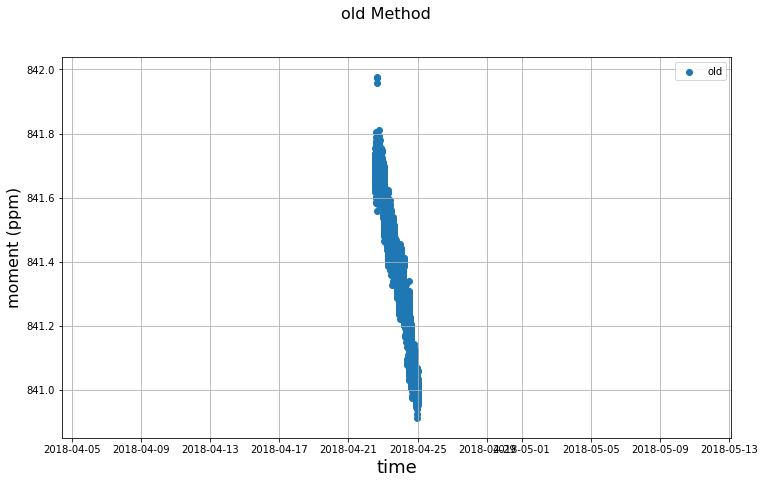

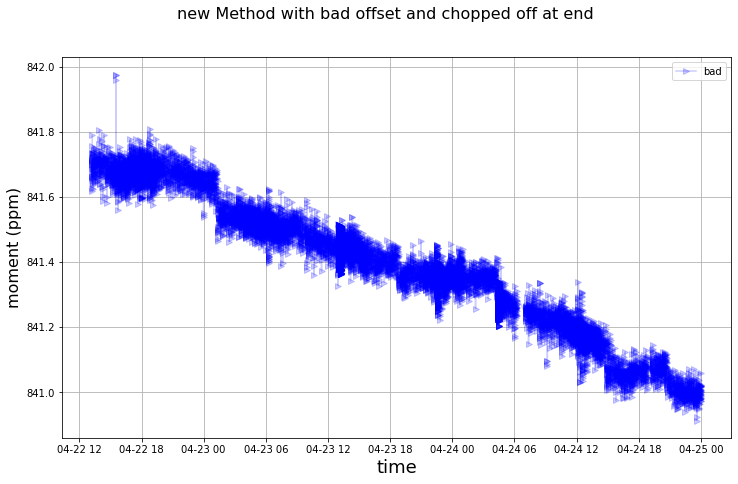

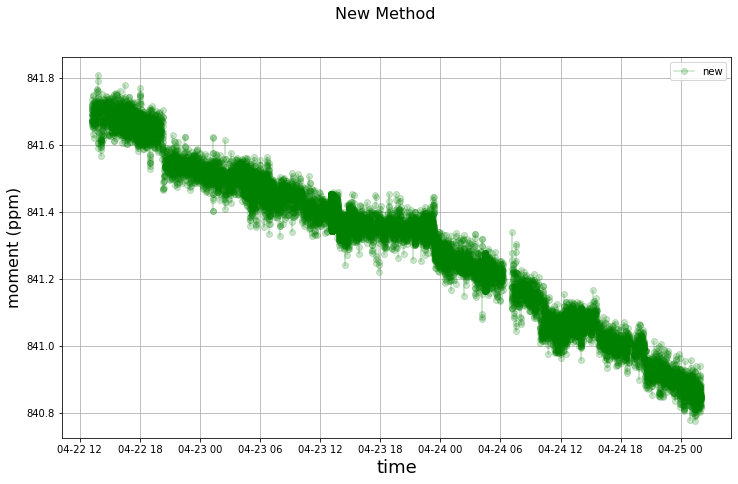

In [34]:
fig = plt.figure(figsize=(12,7))
plt.scatter(df_old['DateTime'], df_old['D'],label='old')
plt.grid()
fig.suptitle('old Method', fontsize=16)
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()
plt.show()
fig = plt.figure(figsize=(12,7))
plt.plot(df_bad['DateTime'], df_bad['D'], 'b',alpha=0.2,marker='>',label='bad')
plt.grid()
fig.suptitle('new Method with bad offset and chopped off at end', fontsize=16)
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()
plt.show()
fig = plt.figure(figsize=(12,7))
plt.plot(df_new['DateTime'], df_new['D'], 'g',alpha=0.2,marker='o',label='new')
plt.grid()
fig.suptitle('New Method', fontsize=16)
plt.xlabel('time', fontsize=18)
plt.ylabel('moment (ppm)', fontsize=16)
plt.legend()
plt.show()

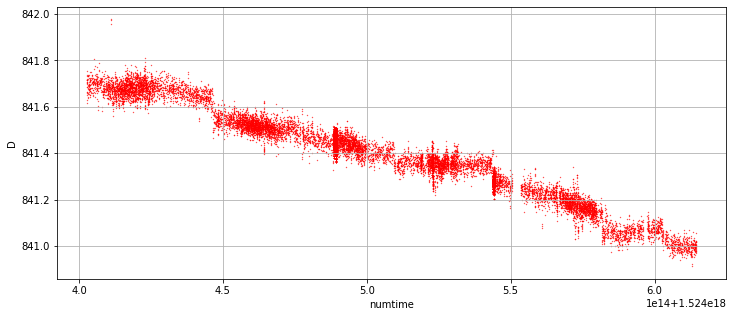

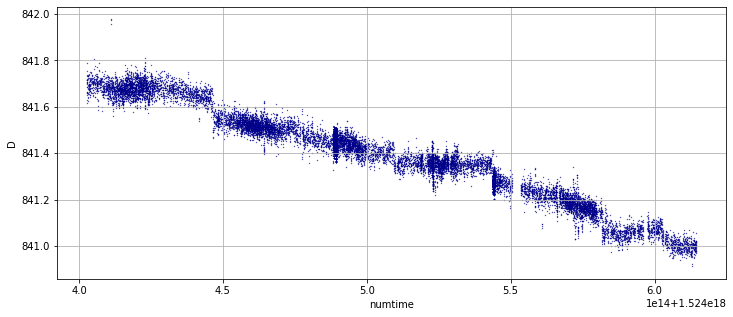

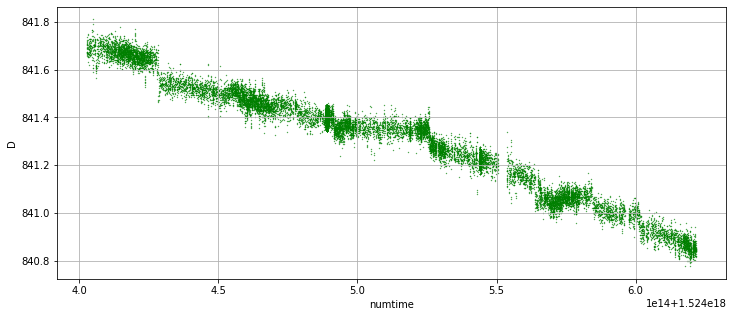

In [50]:
df_old['numtime'] = df_old.DateTime.values.astype(float)
df_old.plot.scatter(x='numtime',y='D',c='Red',s=0.1,figsize=(12,5))
plt.grid()
df_bad['numtime'] = df_bad.DateTime.values.astype(float)
df_bad.plot.scatter(x='numtime',y='D',c='DarkBlue',s=0.1,figsize=(12,5))
plt.grid()
df_new['numtime'] = df_new.DateTime.values.astype(float)
df_new.plot.scatter(x='numtime',y='D',c='Green',s=0.1,figsize=(12,5))
plt.grid()